## Machine Learning - Assignment 01
#### Student: Eduardo Augusto Militão Fernandes
#### Email: e.fernandes@innopolis.university

# Regression Task - Bitrate Prediction

## Read dataset from memory

In [1]:
import pandas as pd
import numpy as np

regression_df_train = pd.read_csv("bitrate_prediction/bitrate_train.csv")
regression_df_test = pd.read_csv("bitrate_prediction/bitrate_test.csv")

regression_df_train

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0
...,...,...,...,...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633,3325.0
379017,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234,3293.0
379018,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892,3317.0
379019,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319,3283.0


## Data preprocessing

### Dropping duplicated rows

In [2]:
regression_df_train.drop_duplicates(inplace=True)
regression_df_train = pd.DataFrame(regression_df_train.to_numpy(), columns=regression_df_train.columns)

### Splitting data in features and target

In [3]:
X_regression_train = regression_df_train.drop(["target"], axis=1)
y_regression_train = regression_df_train["target"]

X_regression_test = regression_df_test.drop(["target"], axis=1)
y_regression_test = regression_df_test["target"]

X_regression_train

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295
...,...,...,...,...,...,...,...,...,...
375655,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633
375656,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234
375657,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892
375658,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319


### Encoding categorical features

Since there are no categorical features in this dataset, this step was not necessary.

### Data Input

In [4]:
print("Training dataset")
print(np.sum(X_regression_train.isna(), axis=0))
print("\nTesting dataset")
print(np.sum(X_regression_test.isna(), axis=0))

Training dataset
fps_mean               0
fps_std                0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
bitrate_mean           0
bitrate_std            0
dtype: int64

Testing dataset
fps_mean               0
fps_std                0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
bitrate_mean           0
bitrate_std            0
dtype: int64


Since there is no missing data, this step was not necessary

### Scaling features

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_regression_train_scaled = pd.DataFrame(scaler.fit_transform(X_regression_train), columns=X_regression_train.columns)
X_regression_test_scaled = pd.DataFrame(scaler.transform(X_regression_test), columns=X_regression_train.columns)

X_regression_train_scaled

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std
0,-0.987262,-0.487601,0.440883,-0.054373,-0.107245,-0.14937,-0.150287,-1.168388,-0.935080
1,-0.603115,0.129170,0.531993,0.026912,-0.107245,-0.14937,-0.150287,-1.142727,-0.849268
2,-0.475066,-0.693192,0.515042,-0.009534,-0.107245,-0.14937,-0.150287,-1.151143,-0.934250
3,-0.447627,-0.315498,0.528815,0.001207,-0.107245,-0.14937,-0.150287,-1.149727,-0.923058
4,-0.484213,-0.567294,0.780957,0.438223,-0.107245,-0.14937,-0.150287,-1.147750,-0.904993
...,...,...,...,...,...,...,...,...,...
375655,0.439570,-0.693192,-0.524249,-0.113781,-0.107245,-0.14937,-0.150287,-0.696600,-0.908832
375656,0.439570,-0.693192,-0.524249,-0.113781,-0.107245,-0.14937,-0.150287,-0.696534,-0.901185
375657,0.439570,-0.693192,-0.524249,-0.113781,-0.107245,-0.14937,-0.150287,-0.701821,-0.914344
375658,0.439570,-0.693192,-0.524249,-0.113781,-0.107245,-0.14937,-0.150287,-0.697901,-0.916273


## Data visualization

### Description of the data

In [6]:
regression_df_train.describe()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
count,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000
mean,35.194048,1.741145,49.484502,12.877867,0.175538,0.473749,1.457171,7554.214734,1617.833390,7563.104560
std,10.933325,2.511782,94.391400,113.180932,1.636790,3.171648,9.695925,6071.376387,1721.977586,6068.116685
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.800000,0.316228,14.300000,0.699206,0.000000,0.000000,0.000000,2828.675000,400.751461,2842.000000
50%,30.000000,0.948683,32.100000,1.475730,0.000000,0.000000,0.000000,6319.900000,1127.644659,6331.000000
75%,43.500000,2.260777,55.500000,5.016639,0.000000,0.000000,0.000000,10198.800000,2256.469076,10204.000000
max,125.800000,307.167273,12898.400000,40721.933293,540.000000,202.385770,640.000000,64913.500000,26908.532303,64913.000000


In [7]:
regression_df_train.corr(method="spearman")

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
fps_mean,1.000000,0.180196,0.036214,-0.046461,0.027380,0.029777,0.027748,0.269220,0.228846,0.261498
fps_std,0.180196,1.000000,0.090510,0.108706,0.256703,0.259833,0.256794,0.064593,0.340301,0.070336
rtt_mean,0.036214,0.090510,1.000000,0.356602,0.034697,0.036951,0.034830,-0.178838,-0.081631,-0.178599
rtt_std,-0.046461,0.108706,0.356602,1.000000,0.053905,0.056486,0.053937,-0.106179,0.027308,-0.109445
dropped_frames_mean,0.027380,0.256703,0.034697,0.053905,1.000000,0.995366,0.999972,0.054903,0.091342,0.051669
dropped_frames_std,0.029777,0.259833,0.036951,0.056486,0.995366,1.000000,0.995567,0.055268,0.092688,0.051903
dropped_frames_max,0.027748,0.256794,0.034830,0.053937,0.999972,0.995567,1.000000,0.054869,0.091303,0.051637
bitrate_mean,0.269220,0.064593,-0.178838,-0.106179,0.054903,0.055268,0.054869,1.000000,0.626806,0.945656
bitrate_std,0.228846,0.340301,-0.081631,0.027308,0.091342,0.092688,0.091303,0.626806,1.000000,0.607525
target,0.261498,0.070336,-0.178599,-0.109445,0.051669,0.051903,0.051637,0.945656,0.607525,1.000000


### Pandas Profile Report

In [8]:
from pandas_profiling import ProfileReport

report = ProfileReport(regression_df_train)
# report.to_file('bitrate_profile_report.html')

/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Plotting independent variables against target variable

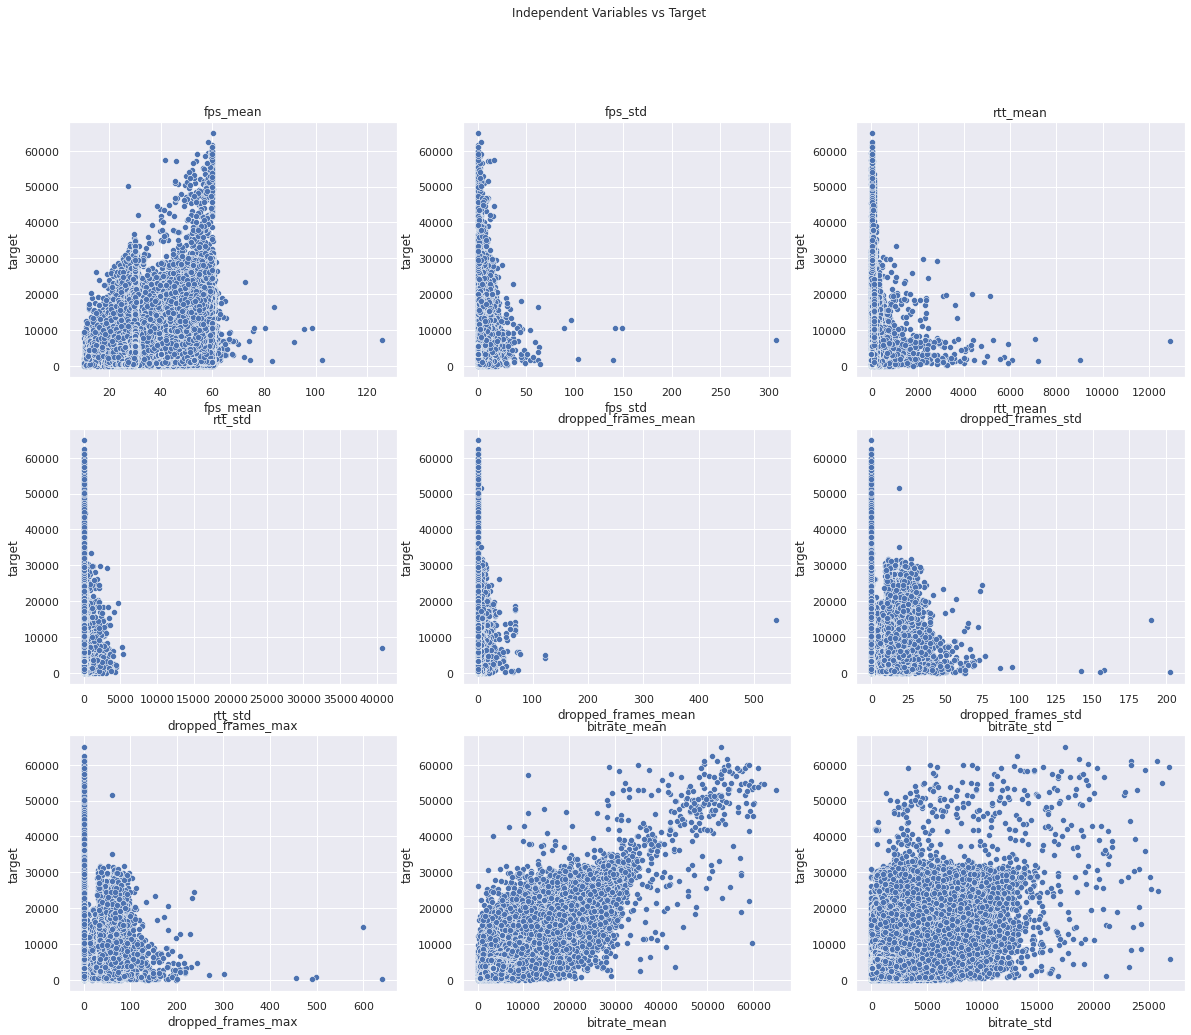

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Independent Variables vs Target')

variables_to_plot = X_regression_train.columns
for ax_row in range(3):
    for ax_col in range(3):
        variable = variables_to_plot[ax_row * 3 + ax_col]
        sns.scatterplot(ax=axes[ax_row][ax_col], x=regression_df_train[variable], y=regression_df_train["target"]);
        axes[ax_row][ax_col].set_title(variable)

### PCA

In [10]:
from sklearn.decomposition import PCA

def plot_pca_projection(dataset, n_components, target_column):
    """Applies PCA transformation on the dataset data and plots
       it against the target variable.
    
    Parameters
    ----------
    dataset : pandas DataFrame
        Data
    n_components : int
        Number of components to be used in PCA transformation
    target_column : str
        Name of the column of the dependent variable
    """
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(dataset.drop([target_column], axis=1))
    sns.scatterplot(x=x_pca.reshape(1, -1)[0], y=dataset[target_column].values)
    plt.xlabel("Component 1");
    plt.ylabel("Target");
    plt.title("Component 1 from PCA transformation vs Target Variable");
    plt.show();

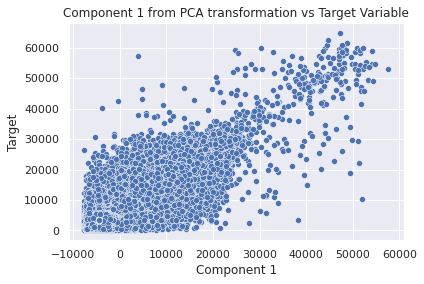

In [11]:
plot_pca_projection(regression_df_train, 1, "target")

## Feature Selection

Through pandas profile report, it can be seen that the variables "dropped_frames_mean", "dropped_frames_std" and "dropped_frames_max" are equal to zero in more than 97% of the rows in the dataset, besides having almost zero correlation with the target variable. Therefore, it was decided do drop those columns.

Furthermore, the variables "fps_std" and "rtt_std" have a Spearman correlation of less than 0.15 in absolute value to the target variable, and so they were also dropped.

In [12]:
X_regression_train_scaled.drop(["dropped_frames_mean", "dropped_frames_std", "dropped_frames_max", "fps_std", "rtt_std"], axis=1, inplace=True)
X_regression_test_scaled.drop(["dropped_frames_mean", "dropped_frames_std", "dropped_frames_max", "fps_std", "rtt_std"], axis=1, inplace=True)

X_regression_train_scaled

,fps_mean,rtt_mean,bitrate_mean,bitrate_std
0,-0.987262,0.440883,-1.168388,-0.935080
1,-0.603115,0.531993,-1.142727,-0.849268
2,-0.475066,0.515042,-1.151143,-0.934250
3,-0.447627,0.528815,-1.149727,-0.923058
4,-0.484213,0.780957,-1.147750,-0.904993
...,...,...,...,...
375655,0.439570,-0.524249,-0.696600,-0.908832
375656,0.439570,-0.524249,-0.696534,-0.901185
375657,0.439570,-0.524249,-0.701821,-0.914344
375658,0.439570,-0.524249,-0.697901,-0.916273


## Metrics

The metrics chosen were:
- Mean Absolute Error
- Rooted Mean Squared Error
- R^2

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def calculate_regression_metrics(y_true, y_pred):
    """Calculates and returns the metrics Mean Absolute Error,
       Rooted Mean Squared Error and R2 for a given list of 
       predictions
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,)
        Estimated values as returned by a classifier.

    Returns
    -------
    mae : float
        Mean Absolute Error metric
    rmse : float
        Rooted Mean Squared Error metric
    r2 : float
        R2 metric
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return [mae, rmse, r2]
    

def print_regression_metrics(mae, rmse, r2):
    """Prints the metrics formatted and with labels
    
    Parameters
    ----------
    mae : float
        Mean Absolute Error value
    rmse : float
        Rooted Mean Squared Error value
    r2: float
        R2 value
    """
    print("MAE: %.4f" % mae)
    print("RMSE: %.4f" % rmse)
    print("R2: %.4f" % r2)


## Regression

In [14]:
from sklearn.model_selection import KFold

def train_and_evaluate_regression(model, X_train, y_train, X_test, y_test):
    """Fits the model on the X_train data, and then performs
       the prediction on both train and test dataset. Lastly,
       calculates the evaluation metrics for both training and
       testing set, using cross-validation for the former.
    
    Parameters
    ----------
    model : sklearn.linear_model model
        Regression model used as prediction algorithm
    X_train : array-like of shape (n_samples, n_features)
        Training data
    y_train : array-like of shape (n_samples, )
        Target values of the training dataset
    X_test : array-like of shape (n_samples, n_features)
        Test data
    y_test : array-like of shape (n_samples, )
        Target values of the test dataset
    """
    kf = KFold(n_splits=5, shuffle=False)
    cross_val_metrics = []

    for train_index, val_index in kf.split(X_train):
        model.fit(X_train[train_index], y_train[train_index])
        y_pred_val = model.predict(X_train[val_index])
        cross_val_metrics.append(calculate_regression_metrics(y_train[val_index], y_pred_val))

    cross_val_metrics = np.mean(cross_val_metrics, axis=0)
    print("Metrics on training dataset")
    print_regression_metrics(cross_val_metrics[0], cross_val_metrics[1], cross_val_metrics[2])
    
    # Uses entire training dataset to perform predictions on test dataset
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    test_metrics = calculate_regression_metrics(y_test, y_pred_test)
    print("\nMetrics on test dataset")
    print_regression_metrics(test_metrics[0], test_metrics[1], test_metrics[2])

### Simple Linear Regression

The feature chosen for the simple linear regression was "fps_mean", since it has a higher correlation to the target variable as compared to "rtt_mean". 

In [15]:
X_fps_mean_train = np.array(X_regression_train_scaled["fps_mean"]).reshape((-1, 1))
X_fps_mean_test = np.array(X_regression_test_scaled["fps_mean"]).reshape((-1, 1))

In [16]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
train_and_evaluate_regression(linear_regressor, X_fps_mean_train, y_regression_train, X_fps_mean_test, y_regression_test)

Metrics on training dataset
MAE: 4677.1573
RMSE: 5923.8404
R2: 0.0364

Metrics on test dataset
MAE: 4563.1077
RMSE: 5863.6270
R2: 0.0359


### Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_regressor = LinearRegression()
features = PolynomialFeatures(degree=3)
X_features_train = features.fit_transform(X_regression_train_scaled)
X_features_test = features.transform(X_regression_test_scaled)
train_and_evaluate_regression(polynomial_regressor, X_features_train, y_regression_train, X_features_test, y_regression_test)

Metrics on training dataset
MAE: 1076.9988
RMSE: 1972.0342
R2: 0.8922

Metrics on test dataset
MAE: 1052.3264
RMSE: 1944.1047
R2: 0.8940


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
train_and_evaluate_regression(lasso_regressor, X_regression_train_scaled.to_numpy(), y_regression_train, X_regression_test_scaled.to_numpy(), y_regression_test)

lasso_regressor.fit(X_regression_train_scaled, y_regression_train)
print("Lasso coefficients:", lasso_regressor.coef_)

Metrics on training dataset
MAE: 1105.9170
RMSE: 1980.9283
R2: 0.8912

Metrics on test dataset
MAE: 1078.3245
RMSE: 1949.1170
R2: 0.8935
Lasso coefficients: [  19.36770979  -44.87033851 5612.31521037  210.32675334]


# Classification Task - Stream Quality Detection

## Read dataset from memory

In [19]:
classification_df_train = pd.read_csv("stream_quality_data/train_data.csv")
classification_df_test = pd.read_csv("stream_quality_data/test_data.csv")

classification_df_train

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,off,partial,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,off,partial,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,off,partial,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,off,partial,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406567,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406568,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406569,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406570,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0


## Data preprocessing

### Data Input

In [20]:
print("Training dataset")
print(np.sum(classification_df_train.isna(), axis=0))
print("\nTesting dataset")
print(np.sum(classification_df_test.isna(), axis=0))

Training dataset
fps_mean               0
fps_std                0
fps_lags               0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
auto_bitrate_state     0
auto_fec_state         0
auto_fec_mean          0
stream_quality         0
dtype: int64

Testing dataset
fps_mean               0
fps_std                0
fps_lags               0
rtt_mean               0
rtt_std                0
dropped_frames_mean    0
dropped_frames_std     0
dropped_frames_max     0
auto_bitrate_state     0
auto_fec_state         0
auto_fec_mean          0
stream_quality         0
dtype: int64


Since there is no missing data, this step was not necessary

### Drop duplicate rows

In [21]:
classification_df_train.drop_duplicates(inplace=True)

### Encoding categorical features

In [22]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=["auto_bitrate_state", "auto_fec_state"])
classification_df_train_encoded = encoder.fit_transform(classification_df_train)
classification_df_test_encoded = encoder.transform(classification_df_test)

classification_df_train_encoded

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state_1,auto_bitrate_state_2,auto_bitrate_state_3,auto_fec_state_1,auto_fec_state_2,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.000000,0.0,1,0,0,1,0,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.000000,0.0,1,0,0,1,0,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.000000,0.0,1,0,0,1,0,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.000000,0.0,1,0,0,1,0,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.000000,0.0,1,0,0,1,0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406556,48.3,12.302213,0,119.3,0.674949,8.5,26.879360,85.0,0,1,0,1,0,50.0,0
406557,48.7,8.957306,0,119.8,0.788811,6.8,21.503488,68.0,0,1,0,1,0,50.0,0
406558,54.2,7.099296,0,119.4,0.516398,0.0,0.000000,0.0,0,1,0,1,0,50.0,0
406559,49.5,7.575545,0,120.0,0.816497,0.0,0.000000,0.0,0,1,0,1,0,50.0,0


### Separate independent and dependent variables

In [23]:
X_train = pd.DataFrame(classification_df_train_encoded.drop(["stream_quality"], axis=1).to_numpy(), columns=classification_df_train_encoded.columns[:-1])
y_train = pd.Series(classification_df_train_encoded["stream_quality"].to_numpy(), name="stream_quality")
X_test = classification_df_test_encoded.drop(["stream_quality"], axis=1)
y_test = classification_df_test_encoded["stream_quality"]

X_train

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state_1,auto_bitrate_state_2,auto_bitrate_state_3,auto_fec_state_1,auto_fec_state_2,auto_fec_mean
0,24.4,0.516398,0.0,91.1,6.723921,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,50.0
1,28.6,2.065591,0.0,99.7,15.923777,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,50.0
2,30.0,0.000000,0.0,98.1,11.798776,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,50.0
3,30.3,0.948683,0.0,99.4,13.014522,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,50.0
4,29.9,0.316228,0.0,123.2,62.476307,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373137,48.3,12.302213,0.0,119.3,0.674949,8.5,26.879360,85.0,0.0,1.0,0.0,1.0,0.0,50.0
373138,48.7,8.957306,0.0,119.8,0.788811,6.8,21.503488,68.0,0.0,1.0,0.0,1.0,0.0,50.0
373139,54.2,7.099296,0.0,119.4,0.516398,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,50.0
373140,49.5,7.575545,0.0,120.0,0.816497,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,50.0


### Scaling

In [24]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state_1,auto_bitrate_state_2,auto_bitrate_state_3,auto_fec_state_1,auto_fec_state_2,auto_fec_mean
0,-0.936606,-0.518445,-0.171559,0.249233,-0.088932,-0.017054,-0.015514,-0.018998,0.493944,-0.492222,-0.033166,0.358826,-0.358826,-0.054997
1,-0.567926,-0.111323,-0.171559,0.312614,-0.032530,-0.017054,-0.015514,-0.018998,0.493944,-0.492222,-0.033166,0.358826,-0.358826,-0.054997
2,-0.445033,-0.654152,-0.171559,0.300822,-0.057819,-0.017054,-0.015514,-0.018998,0.493944,-0.492222,-0.033166,0.358826,-0.358826,-0.054997
3,-0.418699,-0.404842,-0.171559,0.310403,-0.050366,-0.017054,-0.015514,-0.018998,0.493944,-0.492222,-0.033166,0.358826,-0.358826,-0.054997
4,-0.453811,-0.571049,-0.171559,0.485804,0.252876,-0.017054,-0.015514,-0.018998,0.493944,-0.492222,-0.033166,0.358826,-0.358826,-0.054997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373137,1.161358,2.578820,-0.171559,0.457062,-0.126018,-0.017054,-0.015511,-0.018995,-2.024520,2.031602,-0.033166,0.358826,-0.358826,-0.054997
373138,1.196471,1.699792,-0.171559,0.460747,-0.125320,-0.017054,-0.015512,-0.018996,-2.024520,2.031602,-0.033166,0.358826,-0.358826,-0.054997
373139,1.679266,1.211514,-0.171559,0.457799,-0.126990,-0.017054,-0.015514,-0.018998,-2.024520,2.031602,-0.033166,0.358826,-0.358826,-0.054997
373140,1.266695,1.336670,-0.171559,0.462221,-0.125150,-0.017054,-0.015514,-0.018998,-2.024520,2.031602,-0.033166,0.358826,-0.358826,-0.054997


## Data visualization

### Description of the data

In [25]:
classification_df_train.describe()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_fec_mean,stream_quality
count,373142.000000,373142.000000,373142.000000,373142.000000,373142.000000,3.731420e+05,3.731420e+05,3.731420e+05,373142.000000,373142.000000
mean,35.069812,2.489203,0.097370,57.281921,21.229666,3.462350e+05,1.491617e+05,5.222737e+05,51.952779,0.063927
std,11.392012,3.805238,0.567563,135.688714,163.110117,2.030192e+07,9.614595e+06,2.749080e+07,35.506799,0.244624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,28.200000,0.421637,0.000000,16.000000,0.788811,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
50%,30.000000,1.229273,0.000000,34.000000,1.712698,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
75%,44.100000,2.836273,0.000000,59.200000,6.196773,0.000000e+00,0.000000e+00,0.000000e+00,50.000000,0.000000
max,127.100000,312.540842,10.000000,12898.400000,40721.933293,2.097289e+09,9.963751e+08,2.097289e+09,250.000000,1.000000


In [26]:
print("Proportion of negative samples: %.3f" % (np.sum(classification_df_train["stream_quality"] == 0) / len(classification_df_train["stream_quality"])))
print("Proportion of positive samples: %.3f" % (np.sum(classification_df_train["stream_quality"] == 1) / len(classification_df_train["stream_quality"])))

Proportion of negative samples: 0.936
Proportion of positive samples: 0.064


In [27]:
classification_df_train_encoded.corr(method="spearman")

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state_1,auto_bitrate_state_2,auto_bitrate_state_3,auto_fec_state_1,auto_fec_state_2,auto_fec_mean,stream_quality
fps_mean,1.000000,0.118704,-0.177157,0.017989,-0.078102,-0.087386,-0.080755,-0.083740,-0.094507,0.095110,-0.004799,-0.023503,0.023503,0.048399,-0.087284
fps_std,0.118704,1.000000,0.370417,0.028557,0.064992,0.426918,0.432897,0.427190,-0.080871,0.078074,0.035513,-0.041898,0.041898,-0.007739,0.160463
fps_lags,-0.177157,0.370417,1.000000,0.072118,0.124058,0.703625,0.695000,0.699820,-0.027138,0.024580,0.031273,0.025292,-0.025292,0.019716,0.321887
rtt_mean,0.017989,0.028557,0.072118,1.000000,0.339921,0.069102,0.071652,0.069349,0.053078,-0.053990,0.009548,-0.012115,0.012115,-0.030565,0.053811
rtt_std,-0.078102,0.064992,0.124058,0.339921,1.000000,0.116879,0.119757,0.116546,-0.035781,0.034479,0.016483,-0.213469,0.213469,-0.154927,0.080981
dropped_frames_mean,-0.087386,0.426918,0.703625,0.069102,0.116879,1.000000,0.994565,0.999667,-0.026171,0.024082,0.025644,0.040693,-0.040693,0.039901,0.297973
dropped_frames_std,-0.080755,0.432897,0.695000,0.071652,0.119757,0.994565,1.000000,0.994993,-0.026745,0.024636,0.025899,0.042085,-0.042085,0.040945,0.287856
dropped_frames_max,-0.083740,0.427190,0.699820,0.069349,0.116546,0.999667,0.994993,1.000000,-0.026561,0.024473,0.025643,0.040465,-0.040465,0.039739,0.294346
auto_bitrate_state_1,-0.094507,-0.080871,-0.027138,0.053078,-0.035781,-0.026171,-0.026745,-0.026561,1.000000,-0.996514,-0.067145,0.004352,-0.004352,0.085694,-0.026226
auto_bitrate_state_2,0.095110,0.078074,0.024580,-0.053990,0.034479,0.024082,0.024636,0.024473,-0.996514,1.000000,-0.016325,-0.004590,0.004590,-0.087088,0.024795


### Pandas profiling

In [28]:
report = ProfileReport(classification_df_train)
# report.to_file('stream_quality_profile_report.html')

### Ploting independent variables against target variable

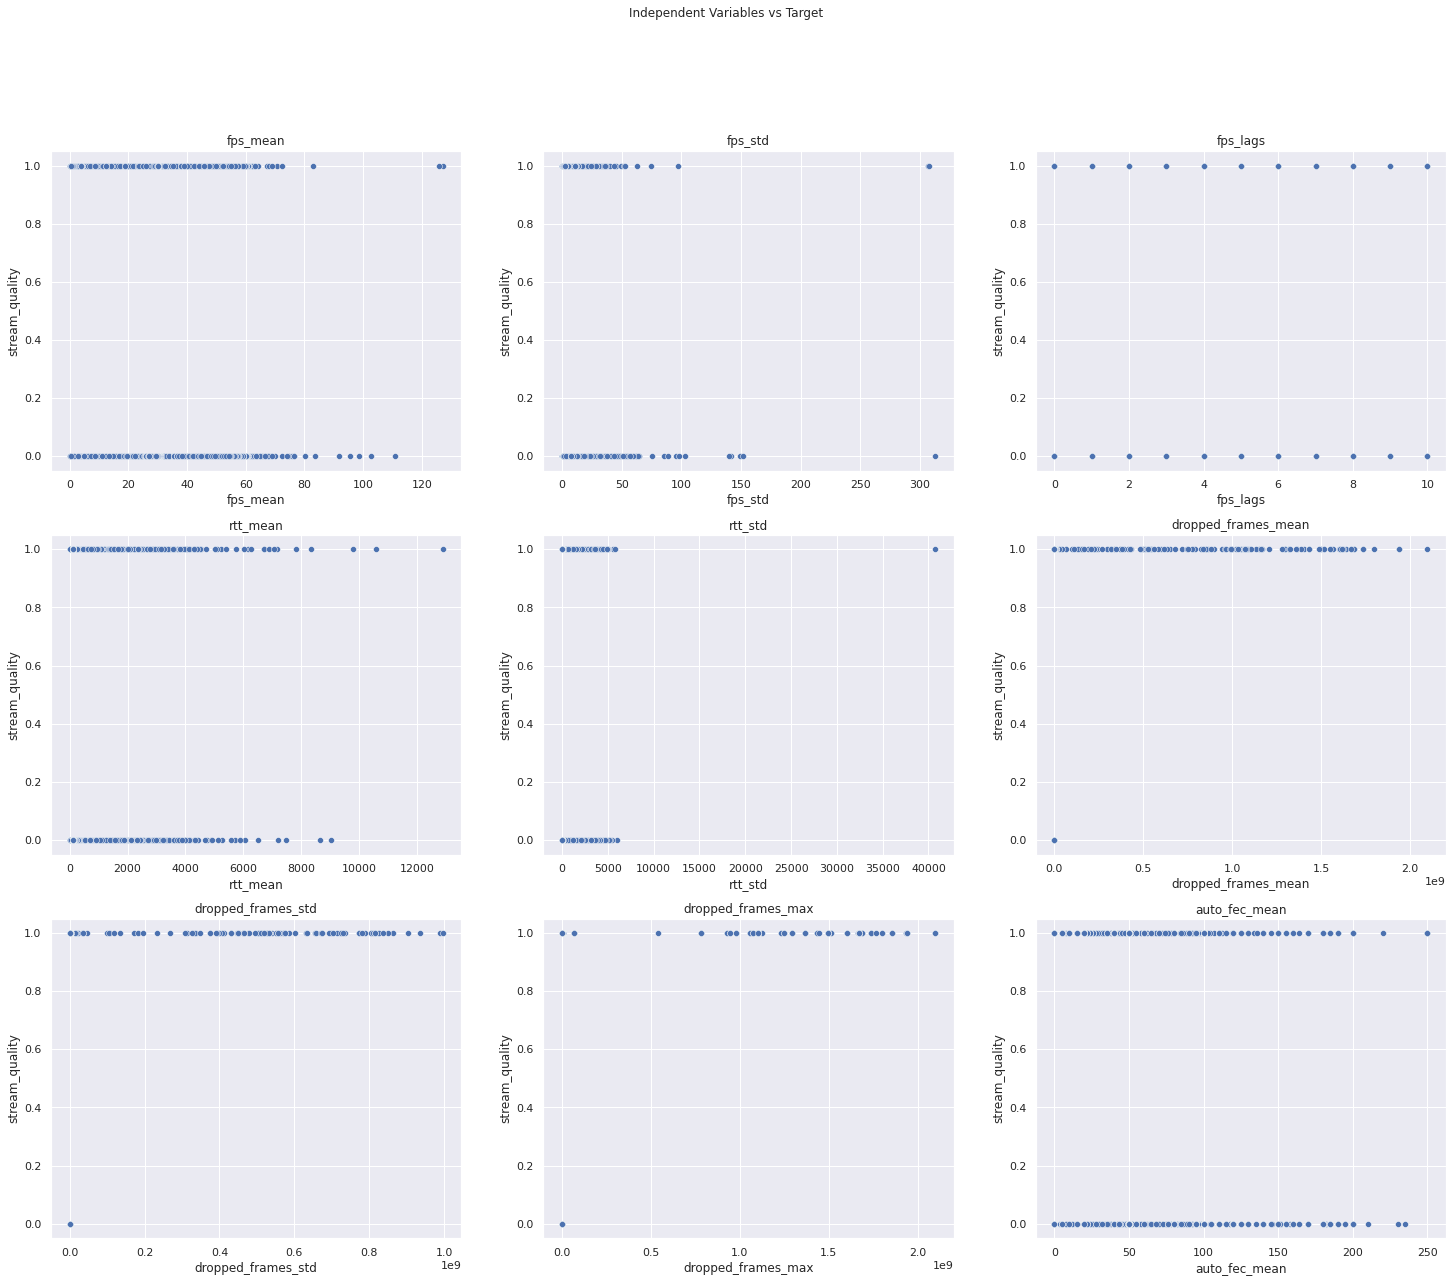

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
fig.suptitle('Independent Variables vs Target') 

# Selects numerical columns
numerical_variables = classification_df_train.select_dtypes(include=[np.number]).columns
for ax_row in range(3):
    for ax_col in range(3):
        variable = numerical_variables[ax_row * 3 + ax_col]
        sns.scatterplot(ax=axes[ax_row][ax_col], x=classification_df_train[variable], y=classification_df_train["stream_quality"]);
        axes[ax_row][ax_col].set_title(variable)

### PCA

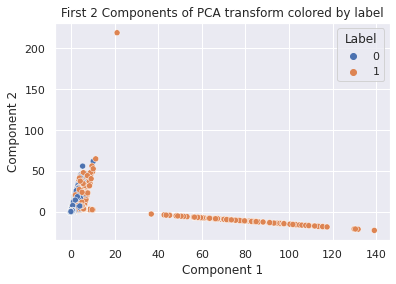

In [30]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train_scaled[numerical_variables[:-1]])

pca_df = pd.DataFrame({"Component 1": x_pca[:,0], "Component 2": x_pca[:,1], "Label": y_train})
sns.scatterplot(data=pca_df, x="Component 1", y="Component 2", hue="Label")
plt.title("First 2 Components of PCA transform colored by label");
plt.show();

## Feature Selection

Even though the Pandas Profile generated for this dataset shows that the columns "fps_lags", "dropped_frames_mean", "dropped_frames_std" and "dropped_frames_max" have a very high percentage of values equal to zero, the dataset is highly unbalanced (almost 94% of the rows belongs to one class), and so it was decided not to immediately discard these columns. Furthermore, when analysing the correlation between the variables of the dataset, it can be observed that these same columns have the highest correlation values to the target variable.

Finally, it was decided to keep only the variables whose correlation to the target variable is over 0.15 in absolute value. However, since "dropped_frames_mean", "dropped_frames_std" and "dropped_frames_max" are also highly correlated to each other, only the first one was kept out of the three.

In [31]:
X_train_scaled = X_train_scaled[["fps_std", "fps_lags", "dropped_frames_mean"]]
X_test_scaled = X_test_scaled[["fps_std", "fps_lags", "dropped_frames_mean"]]

X_train_scaled

,fps_std,fps_lags,dropped_frames_mean
0,-0.518445,-0.171559,-0.017054
1,-0.111323,-0.171559,-0.017054
2,-0.654152,-0.171559,-0.017054
3,-0.404842,-0.171559,-0.017054
4,-0.571049,-0.171559,-0.017054
...,...,...,...
373137,2.578820,-0.171559,-0.017054
373138,1.699792,-0.171559,-0.017054
373139,1.211514,-0.171559,-0.017054
373140,1.336670,-0.171559,-0.017054


## Classification

### Metrics

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_classification_metrics(y_true, y_pred):
    """Calculates and returns the metrics Accuracy,
       Precision, Recall and F1 for a given list of 
       predictions
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,)
        Estimated values as returned by a classifier.

    Returns
    -------
    acc : float
        Accuracy metric
    precision : float
        Precision metric
    recall : float
        Recall metric
    f1 : float
        F1 metric
    """
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return [acc, precision, recall, f1]

def print_classification_metrics(acc, precision, recall, f1):
    """Prints the metrics formatted and with labels
    
    Parameters
    ----------
    acc : float
        Accuracy value
    precision : float
        Precision value
    recall: float
        Recall value
    f1: float
        F1-score value
    """
    print("Accuracy: %.4f" % acc)
    print("Precision: %.4f" % precision)
    print("Recall: %.4f" % recall)
    print("F1: %.4f" % f1)

In [33]:
def train_and_evaluate_classification(model, X_train, y_train, X_test, y_test):
    """Fits the model on the X_train data, and then performs
       the prediction on both train and test dataset. Lastly,
       calculates the evaluation metrics for both training and
       testing set, using cross-validation for the former.
    
    Parameters
    ----------
    model : sklearn.linear_model model
        Classification model used as prediction algorithm
    X_train : array-like of shape (n_samples, n_features)
        Training data
    y_train : array-like of shape (n_samples, )
        Target values of the training dataset
    X_test : array-like of shape (n_samples, n_features)
        Test data
    y_test : array-like of shape (n_samples, )
        Target values of the test dataset
    """
    kf = KFold(n_splits=5, shuffle=False)
    cross_val_metrics = []

    for train_index, val_index in kf.split(X_train):
        model.fit(X_train[train_index], y_train[train_index])
        y_pred_val = model.predict(X_train[val_index])
        y_pred_val = list(map(lambda x: 0 if x <= 0 else 1, y_pred_val))
        cross_val_metrics.append(calculate_classification_metrics(y_train[val_index], y_pred_val))

    cross_val_metrics = np.mean(cross_val_metrics, axis=0)
    print("Metrics on training dataset")
    print_classification_metrics(cross_val_metrics[0], cross_val_metrics[1], cross_val_metrics[2], cross_val_metrics[3])
    
    # Uses entire training dataset to perform predictions on test dataset
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_test = list(map(lambda x: 0 if x <= 0 else 1, y_pred_test))
    test_metrics = calculate_classification_metrics(y_test, y_pred_test)
    print("\nMetrics on test dataset")
    print_classification_metrics(test_metrics[0], test_metrics[1], test_metrics[2], test_metrics[3])

### Threshold Analysis

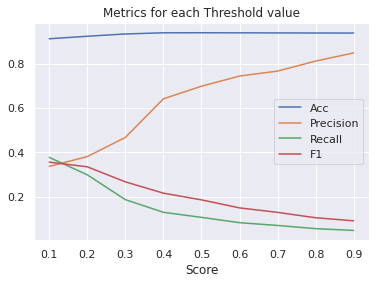

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2")

model.fit(X_train_scaled, classification_df_train["stream_quality"])

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_pred_prob_train = model.predict_proba(X_train_scaled)

results = [[], [], [], []]
for thresh in thresholds:
    y_pred_thresh = np.where(y_pred_prob_train[:,1] > thresh, 1, 0)
    results[0].append(accuracy_score(y_train, y_pred_thresh))
    results[1].append(precision_score(y_train, y_pred_thresh))
    results[2].append(recall_score(y_train, y_pred_thresh))
    results[3].append(f1_score(y_train, y_pred_thresh))

plt.plot(thresholds, results[0], label="Acc")
plt.plot(thresholds, results[1], label="Precision")
plt.plot(thresholds, results[2], label="Recall")
plt.plot(thresholds, results[3], label="F1")
plt.xlabel("Threshold")
plt.xlabel("Score")
plt.title("Metrics for each Threshold value")
plt.grid(True)
plt.legend()
plt.show();

### Models

The models chosen for the classification task were:
- Logistic Regression without Regularization
- Logistic Regression with L1 Regularization
- Logistic Regression with L2 Regularization
- One Class Support Vector Machine

In [35]:
from sklearn.svm import OneClassSVM

def test_models(X_train, y_train, X_test, y_test):
    """Train and evaluate 4 different models for the given dataset
    
    Parameters
    ----------
    X_train : Data-frame of shape (n_samples, n_features)
        Training data
    y_train : Data-frame of shape (n_samples, )
        Target values of the training dataset
    X_test : Data-frame of shape (n_samples, n_features)
        Test data
    y_test : Data-frame of shape (n_samples, )
        Target values of the test dataset
    """
    logistic_wo_reg = LogisticRegression(penalty="none")
    logistic_l1 = LogisticRegression(penalty="l1", solver="liblinear")
    logistic_l2 = LogisticRegression(penalty="l2")
    svm = OneClassSVM()

    print("Logistic Regression without Regularization")
    train_and_evaluate_classification(logistic_wo_reg, X_train.to_numpy(), y_train, X_test.to_numpy(), y_test)
    print("--------------------", end="\n\n")
    print("Logistic Regression with L1 Regularization")
    train_and_evaluate_classification(logistic_l1, X_train.to_numpy(), y_train, X_test.to_numpy(), y_test)
    print("--------------------", end="\n\n")
    print("Logistic Regression with L2 Regularization")
    train_and_evaluate_classification(logistic_l2, X_train.to_numpy(), y_train, X_test.to_numpy(), y_test)
    print("--------------------", end="\n\n")
    print("One Class Support Vector Machine")
    train_and_evaluate_classification(svm, X_train.iloc[np.where(y_train == 1)].drop_duplicates().to_numpy(), y_train, X_test.to_numpy(), y_test)
    print("--------------------", end="\n\n")

In [36]:
test_models(X_train_scaled, y_train, X_test_scaled, y_test)

Logistic Regression without Regularization
Metrics on training dataset
Accuracy: 0.9399
Precision: 0.6940
Recall: 0.1062
F1: 0.1836

Metrics on test dataset
Accuracy: 0.9403
Precision: 0.7121
Recall: 0.1231
F1: 0.2099
--------------------

Logistic Regression with L1 Regularization
Metrics on training dataset
Accuracy: 0.9399
Precision: 0.6940
Recall: 0.1062
F1: 0.1836

Metrics on test dataset
Accuracy: 0.9403
Precision: 0.7120
Recall: 0.1230
F1: 0.2098
--------------------

Logistic Regression with L2 Regularization
Metrics on training dataset
Accuracy: 0.9399
Precision: 0.6940
Recall: 0.1062
F1: 0.1836

Metrics on test dataset
Accuracy: 0.9403
Precision: 0.7120
Recall: 0.1230
F1: 0.2098
--------------------

One Class Support Vector Machine
Metrics on training dataset
Accuracy: 0.5083
Precision: 0.0403
Recall: 0.5057
F1: 0.0723

Metrics on test dataset
Accuracy: 0.8566
Precision: 0.1745
Recall: 0.3284
F1: 0.2279
--------------------



## Removing outliers

In order to remove the outliers in the dataset, the Standard Deviation method was chosen. Since the data was already scaled through a StandardScale, it is enough to check if the absolute value of a feature in a row is larger than 4. If so, then that sample is an outlier regarding such feature. It was decided to remove the entire row from the dataset in this case.

In [37]:
outlier_threshold = 4
np.sum(X_train_scaled.abs() > outlier_threshold)

fps_std                3985
fps_lags               1894
dropped_frames_mean     140
dtype: int64

In [38]:
outliers = np.where(X_train_scaled.abs() > outlier_threshold)
outliers_rows = outliers[0]

X_train_scaled_clean = pd.DataFrame(X_train_scaled.drop(outliers_rows, axis=0).to_numpy(), columns=X_train_scaled.columns)
y_train_clean = pd.Series(y_train.drop(outliers_rows, axis=0).to_numpy(), name="stream_quality")
X_train_scaled_clean

,fps_std,fps_lags,dropped_frames_mean
0,-0.518445,-0.171559,-0.017054
1,-0.111323,-0.171559,-0.017054
2,-0.654152,-0.171559,-0.017054
3,-0.404842,-0.171559,-0.017054
4,-0.571049,-0.171559,-0.017054
...,...,...,...
367532,2.578820,-0.171559,-0.017054
367533,1.699792,-0.171559,-0.017054
367534,1.211514,-0.171559,-0.017054
367535,1.336670,-0.171559,-0.017054


### Testing classification in dataset without outliers

In [39]:
test_models(X_train_scaled_clean, y_train_clean, X_test_scaled, y_test)

Logistic Regression without Regularization
Metrics on training dataset
Accuracy: 0.9435
Precision: 0.5693
Recall: 0.0390
F1: 0.0730

Metrics on test dataset
Accuracy: 0.9403
Precision: 0.6743
Recall: 0.1427
F1: 0.2356
--------------------

Logistic Regression with L1 Regularization
Metrics on training dataset
Accuracy: 0.9435
Precision: 0.5693
Recall: 0.0390
F1: 0.0730

Metrics on test dataset
Accuracy: 0.9403
Precision: 0.6743
Recall: 0.1427
F1: 0.2356
--------------------

Logistic Regression with L2 Regularization
Metrics on training dataset
Accuracy: 0.9435
Precision: 0.5691
Recall: 0.0390
F1: 0.0729

Metrics on test dataset
Accuracy: 0.9403
Precision: 0.6743
Recall: 0.1427
F1: 0.2356
--------------------

One Class Support Vector Machine
Metrics on training dataset
Accuracy: 0.5080
Precision: 0.0221
Recall: 0.4990
F1: 0.0415

Metrics on test dataset
Accuracy: 0.8018
Precision: 0.1184
Recall: 0.3220
F1: 0.1731
--------------------



## Balancing the dataset

It was decided to use Under Sampling to tackle the balancing of the dataset

In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_scaled_clean_balanced, y_train_clean_balanced = rus.fit_resample(X_train_scaled_clean, y_train_clean)

print("Proportion of negative samples: %.3f" % (np.sum(y_train_clean_balanced == 0) / len(y_train_clean_balanced)))
print("Proportion of positive samples: %.3f" % (np.sum(y_train_clean_balanced == 1) / len(y_train_clean_balanced)))
X_train_scaled_clean_balanced

Proportion of negative samples: 0.500
Proportion of positive samples: 0.500


,fps_std,fps_lags,dropped_frames_mean
0,-0.173556,-0.171559,-0.017054
1,-0.321739,-0.171559,-0.017054
2,-0.278396,-0.171559,-0.017054
3,-0.654152,-0.171559,-0.017054
4,-0.543348,-0.171559,-0.017054
...,...,...,...
41923,-0.446856,-0.171559,-0.017054
41924,-0.204062,-0.171559,-0.017054
41925,-0.239560,-0.171559,-0.017054
41926,-0.046619,-0.171559,-0.017054


### Testing classification in balanced dataset

In [41]:
test_models(X_train_scaled_clean_balanced, y_train_clean_balanced, X_test_scaled, y_test)

Logistic Regression without Regularization
Metrics on training dataset
Accuracy: 0.3846
Precision: 0.5517
Recall: 0.2091
F1: 0.2999

Metrics on test dataset
Accuracy: 0.8563
Precision: 0.2297
Recall: 0.5231
F1: 0.3192
--------------------

Logistic Regression with L1 Regularization
Metrics on training dataset
Accuracy: 0.3846
Precision: 0.5517
Recall: 0.2090
F1: 0.2999

Metrics on test dataset
Accuracy: 0.8561
Precision: 0.2296
Recall: 0.5234
F1: 0.3192
--------------------

Logistic Regression with L2 Regularization
Metrics on training dataset
Accuracy: 0.3846
Precision: 0.5517
Recall: 0.2091
F1: 0.2999

Metrics on test dataset
Accuracy: 0.8563
Precision: 0.2297
Recall: 0.5231
F1: 0.3192
--------------------

One Class Support Vector Machine
Metrics on training dataset
Accuracy: 0.5081
Precision: 0.0000
Recall: 0.0000
F1: 0.0000

Metrics on test dataset
Accuracy: 0.8018
Precision: 0.1184
Recall: 0.3220
F1: 0.1731
--------------------

